<a href="https://colab.research.google.com/github/nmedvedeva312/ML-Course-HW/blob/main/HW_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
"""Обучите модель на наборе данных Fashion MNIST для классификации изображений одежды.
Сравните результаты с использованием различных классификаторов."""

'Обучите модель на наборе данных Fashion MNIST для классификации изображений одежды.\nСравните результаты с использованием различных классификаторов.'

In [34]:
# Разархивируем скачанный архив
! unzip /content/archive.zip

Archive:  /content/archive.zip
replace fashion-mnist_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [42]:
# Загрузка библиотек
import pandas as pd
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [43]:
# Загрузка данных
train_df = pd.read_csv("fashion-mnist_train.csv")
test_df = pd.read_csv("fashion-mnist_test.csv")
# path = '/content/online_shoppers_intention.csv'
# df = pd.read_csv (path)

In [44]:
# Вывод информации о датасете
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB
None


In [58]:
# Проверка на пропущенные значения
# Пропущенных значений нет, данные сбалансированы
print("Пропущенные в X_train:", X_train.isnull().sum().sum())
print("Пропущенные в y_train:", y_train.isnull().sum())

Пропущенные в X_train: 0
Пропущенные в y_train: 0


In [46]:
# Выделение признаков (X) и целевой переменной (y)
X_train = train_df.drop("label", axis=1)
y_train = train_df["label"]

X_test = test_df.drop("label", axis=1)
y_test = test_df["label"]

In [47]:
# Количество объектов и размерности в train_df и test_df
print("Размер обучающей выборки (train_df):", train_df.shape)
print("Размер тестовой выборки (test_df):", test_df.shape)

Размер обучающей выборки (train_df): (60000, 785)
Размер тестовой выборки (test_df): (10000, 785)


In [48]:
# Подробное распределение по классам
print("\nРаспределение классов в train_df:")
print(train_df['label'].value_counts().sort_index())

print("\nРаспределение классов в test_df:")
print(test_df['label'].value_counts().sort_index())


Распределение классов в train_df:
label
0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
Name: count, dtype: int64

Распределение классов в test_df:
label
0    1000
1    1000
2    1000
3    1000
4    1000
5    1000
6    1000
7    1000
8    1000
9    1000
Name: count, dtype: int64


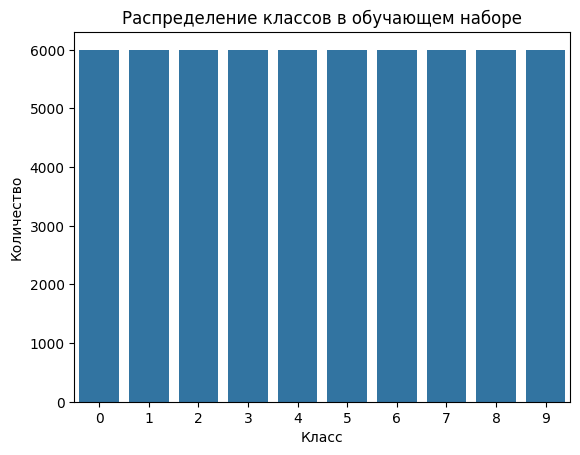

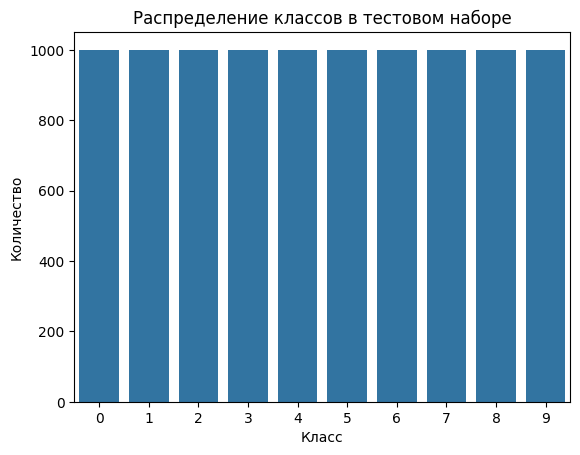

In [49]:
#  Распределение классов
import seaborn as sns

sns.countplot(x=y_train)
plt.title("Распределение классов в обучающем наборе")
plt.xlabel("Класс")
plt.ylabel("Количество")
plt.show()

sns.countplot(x=y_test)
plt.title("Распределение классов в тестовом наборе")
plt.xlabel("Класс")
plt.ylabel("Количество")
plt.show()

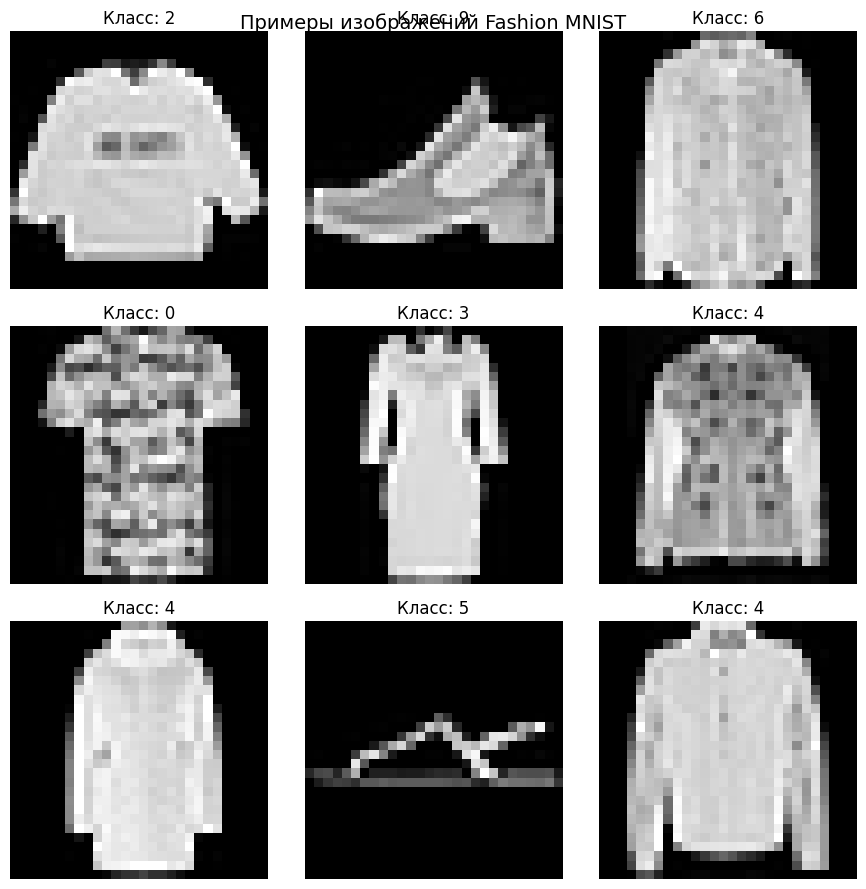

In [50]:
# Визуализация первых изображений (из вектора в 28×28 пикселей)
import matplotlib.pyplot as plt
import numpy as np

# Визуализация первых 9 изображений
plt.figure(figsize=(9, 9))
for i in range(9):
    img = X_train.iloc[i].values.reshape(28, 28)
    label = y_train.iloc[i]
    plt.subplot(3, 3, i+1)
    plt.imshow(img, cmap="gray")
    plt.title(f"Класс: {label}")
    plt.axis("off")
plt.tight_layout()
plt.suptitle("Примеры изображений Fashion MNIST", fontsize=14)
plt.show()


In [51]:
# Стандартизация признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
# Сравниваем Классификаторы
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Названия классов
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Словарь моделей
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "LDA": LinearDiscriminantAnalysis()
}

results = {}
conf_matrices = {}

# Обучение и оценка
for name, model in models.items():
    print(f"\n🔍 Модель: {name}")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    print("Accuracy:", round(acc, 4))
    print(classification_report(y_test, y_pred))

    results[name] = acc
    conf_matrices[name] = confusion_matrix(y_test, y_pred)


🔍 Модель: Logistic Regression


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.844
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1000
           1       0.95      0.97      0.96      1000
           2       0.76      0.75      0.76      1000
           3       0.85      0.85      0.85      1000
           4       0.77      0.80      0.78      1000
           5       0.93      0.90      0.91      1000
           6       0.64      0.59      0.61      1000
           7       0.89      0.92      0.90      1000
           8       0.93      0.92      0.92      1000
           9       0.92      0.93      0.93      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000


🔍 Модель: Random Forest
Accuracy: 0.8852
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0

In [54]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Создание таблицы метрик
metrics_table = []

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    metrics_table.append({
        'Model': name,
        'Accuracy': round(acc, 4),
        'Precision': round(prec, 4),
        'Recall': round(rec, 4),
        'F1 Score': round(f1, 4)
    })

# Вывод таблицы
results_df = pd.DataFrame(metrics_table).sort_values(by="F1 Score", ascending=False)
print("\n📊 Таблица сравнения моделей:")
print(results_df.to_string(index=False))


📊 Таблица сравнения моделей:
              Model  Accuracy  Precision  Recall  F1 Score
                SVM    0.8945     0.8937  0.8945    0.8937
      Random Forest    0.8852     0.8839  0.8852    0.8836
                KNN    0.8630     0.8652  0.8630    0.8626
Logistic Regression    0.8440     0.8425  0.8440    0.8430
                LDA    0.8256     0.8275  0.8256    0.8262
        Naive Bayes    0.5791     0.6287  0.5791    0.5502


<ipython-input-65-171beb4d9990>:15: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


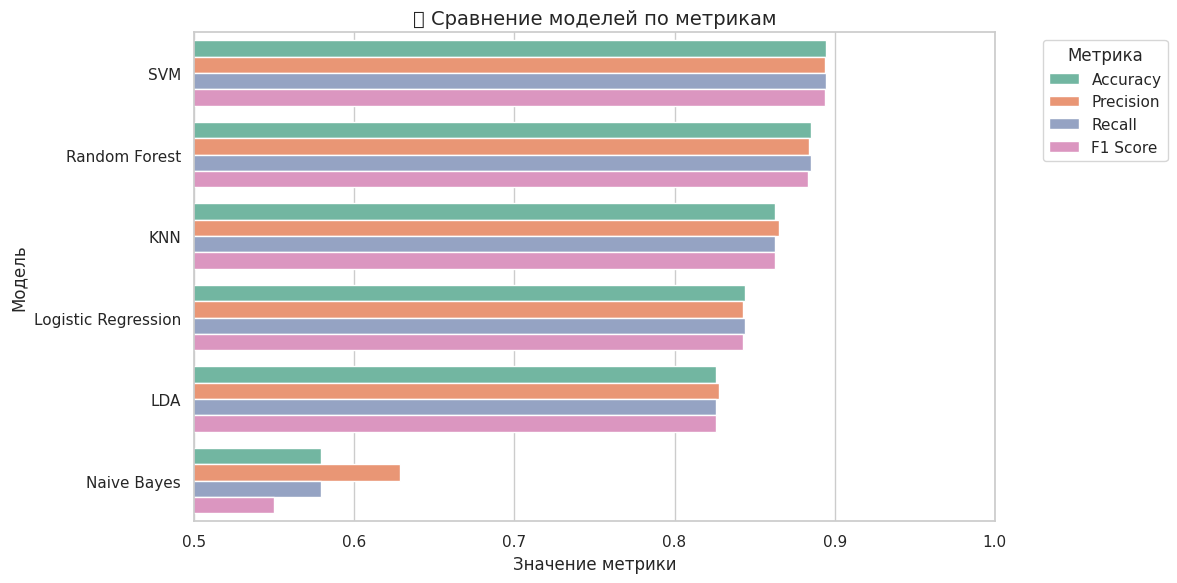

In [65]:
# Создаем DataFrame из таблицы (автоматическое подставление данных)
df_metrics = pd.DataFrame(metrics_table)

# Преобразуем таблицу для построения графика
df_melted = df_metrics.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Строим график
plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x='Score', y='Model', hue='Metric', palette='Set2')
plt.title('📊 Сравнение моделей по метрикам', fontsize=14)
plt.xlabel('Значение метрики')
plt.ylabel('Модель')
plt.xlim(0.5, 1.0)
plt.legend(title='Метрика', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<ipython-input-66-9d8cc822bd58>:25: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


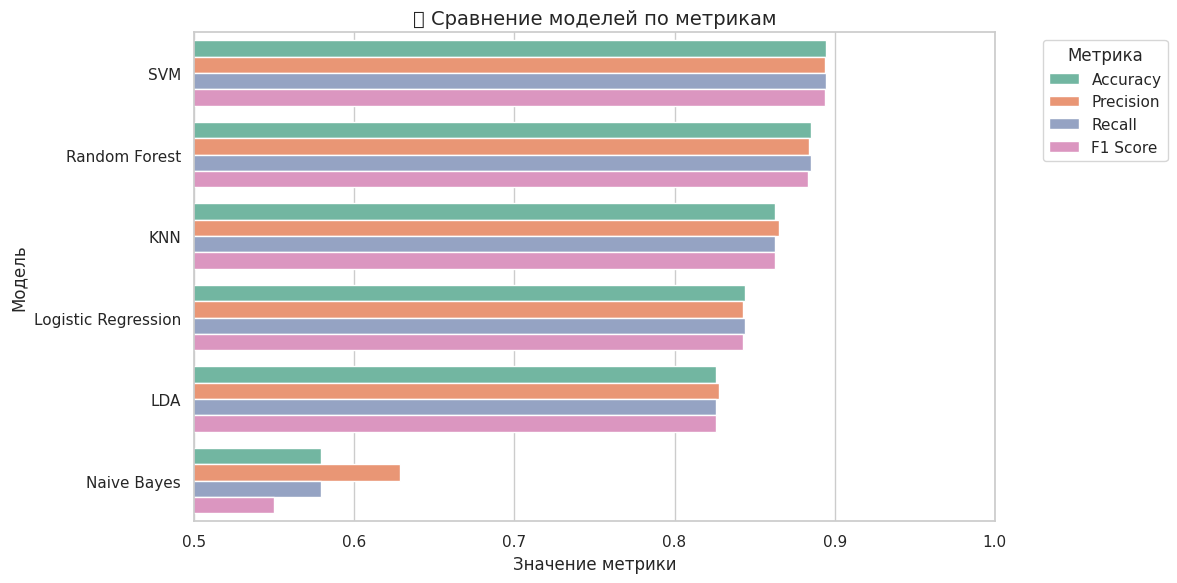

In [66]:
# Данные из таблицым - 2й вариант
metrics_table = {
    'Model': [
        'SVM', 'Random Forest', 'KNN',
        'Logistic Regression', 'LDA', 'Naive Bayes'
    ],
    'Accuracy': [0.8945, 0.8852, 0.8630, 0.8440, 0.8256, 0.5791],
    'Precision': [0.8937, 0.8839, 0.8652, 0.8425, 0.8275, 0.6287],
    'Recall': [0.8945, 0.8852, 0.8630, 0.8440, 0.8256, 0.5791],
    'F1 Score': [0.8937, 0.8836, 0.8626, 0.8430, 0.8262, 0.5502]
}

# Создание DataFrame и преобразование для построения графика
df_metrics = pd.DataFrame(metrics_table)
df_melted = df_metrics.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Построение графика
plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x='Score', y='Model', hue='Metric', palette='Set2')
plt.title('📊 Сравнение моделей по метрикам', fontsize=14)
plt.xlabel('Значение метрики')
plt.ylabel('Модель')
plt.xlim(0.5, 1.0)
plt.legend(title='Метрика', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<ipython-input-72-39e10fdd1688>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="F1 Score", y="Model", palette="viridis")
<ipython-input-72-39e10fdd1688>:12: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


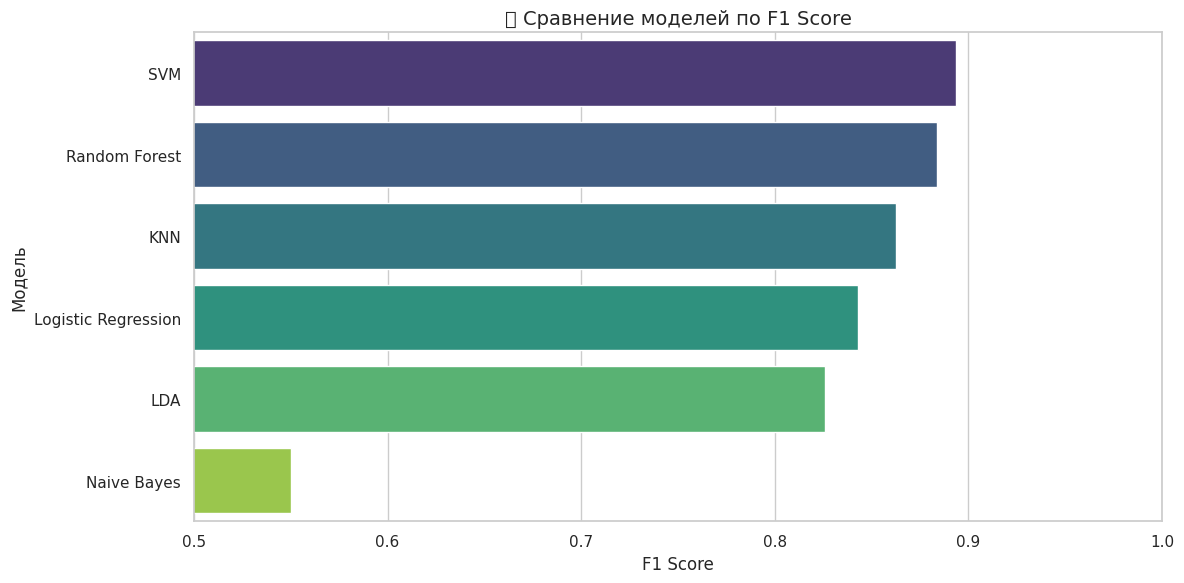

In [72]:
# Построим график для F1 Score

# Установка стиля
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

sns.barplot(data=results_df, x="F1 Score", y="Model", palette="viridis")
plt.title("📊 Сравнение моделей по F1 Score", fontsize=14)
plt.xlabel("F1 Score")
plt.ylabel("Модель")
plt.xlim(0.5, 1.0)
plt.tight_layout()
plt.show()

<ipython-input-73-6c2e912bc730>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Accuracy", y="Model", palette="viridis")
<ipython-input-73-6c2e912bc730>:12: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


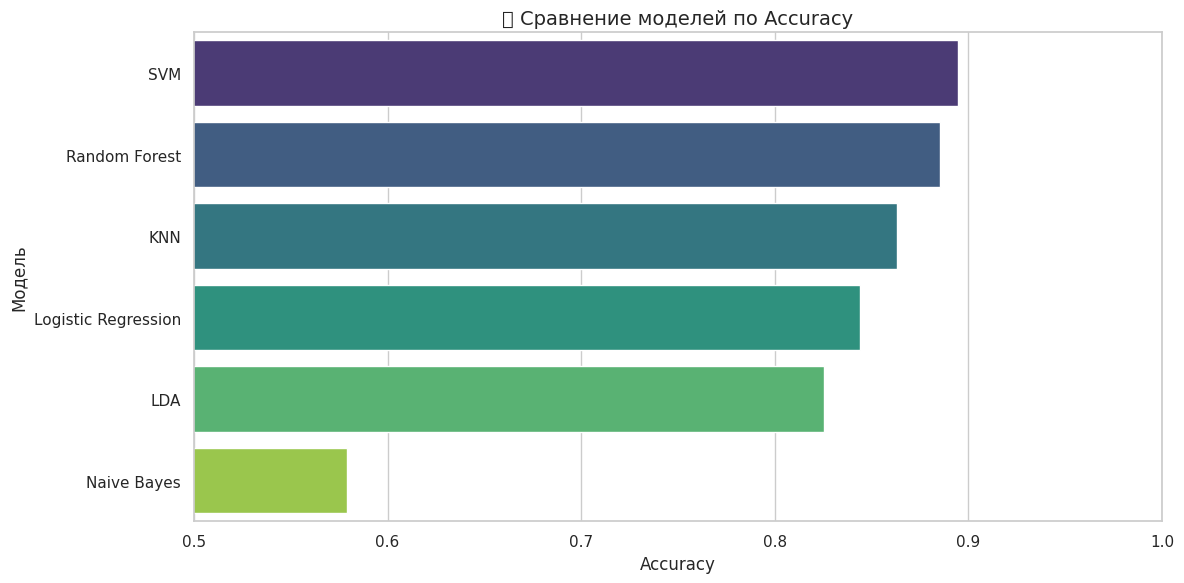

In [73]:
# Построим график для Accuracy

# Установка стиля
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

sns.barplot(data=results_df, x="Accuracy", y="Model", palette="viridis")
plt.title("📊 Сравнение моделей по Accuracy", fontsize=14)
plt.xlabel("Accuracy")
plt.ylabel("Модель")
plt.xlim(0.5, 1.0)
plt.tight_layout()
plt.show()

<ipython-input-67-e2a73909e4a2>:34: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


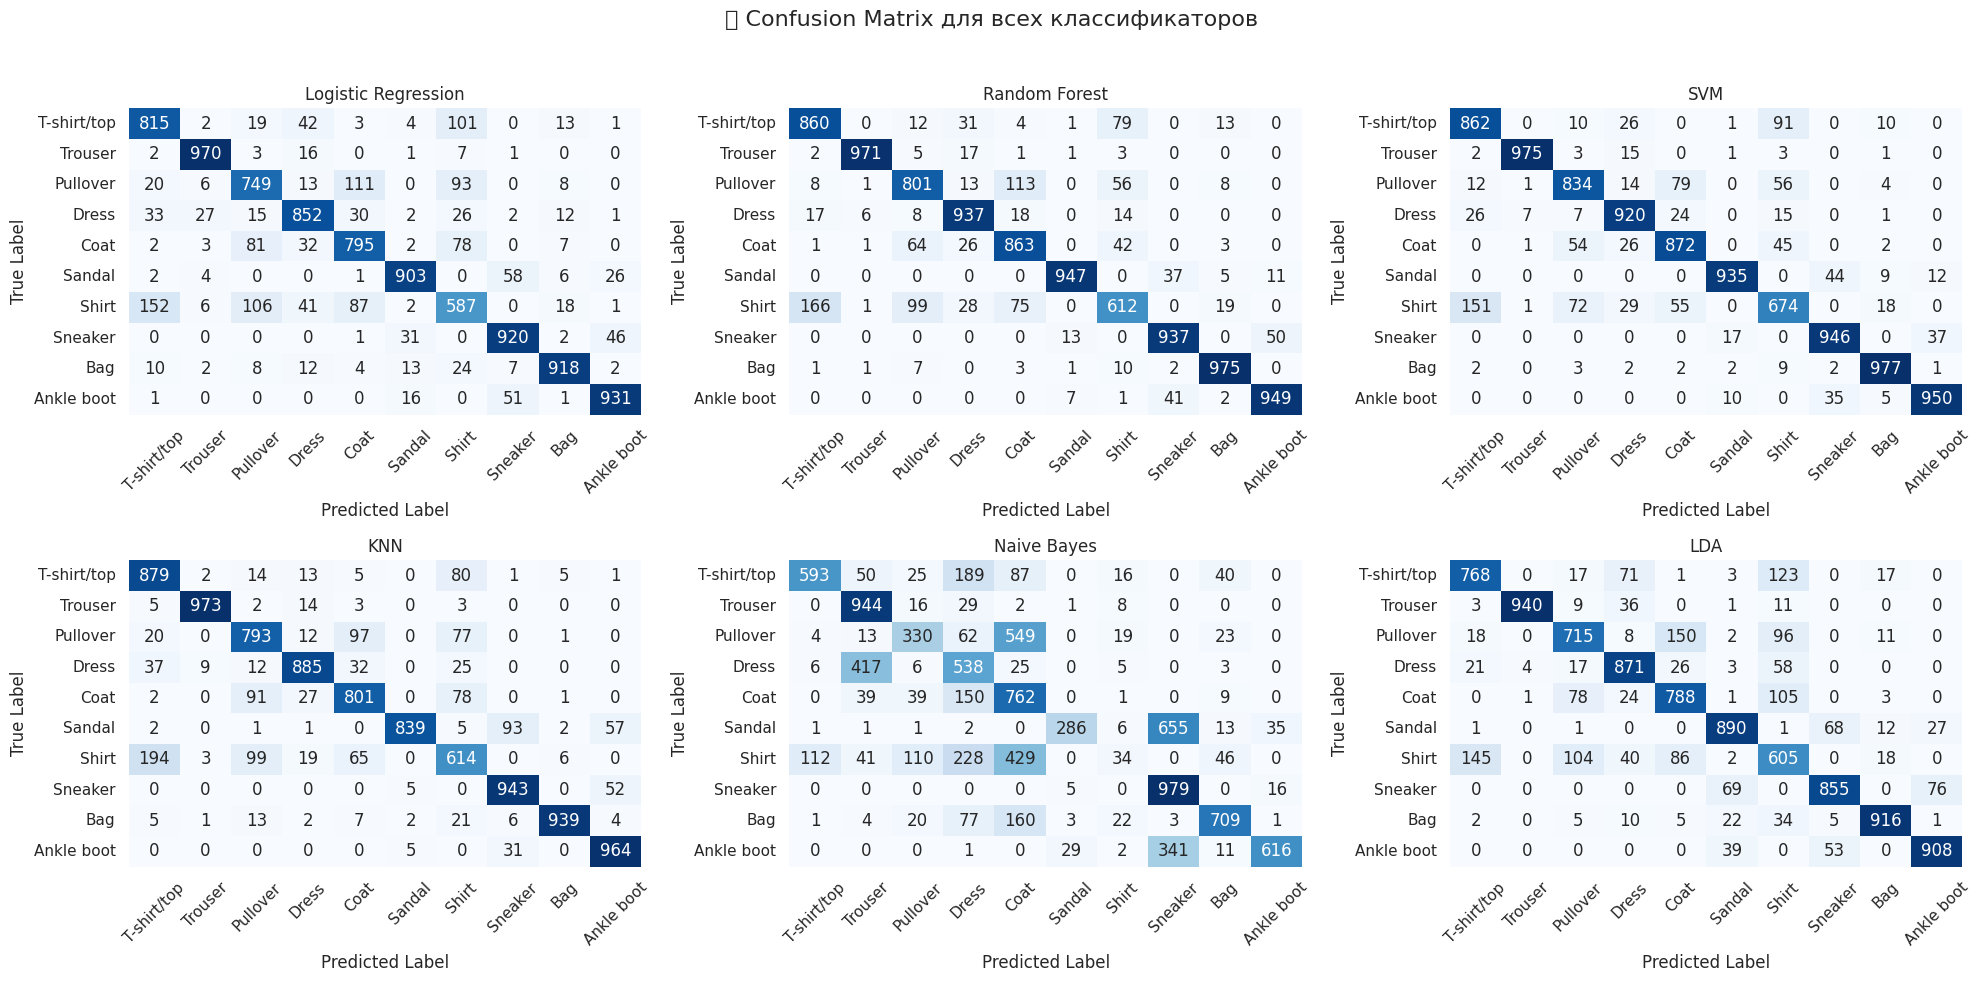

In [67]:
# Confusion Matrix для всех классификаторов
import matplotlib.pyplot as plt
import seaborn as sns

# Названия классов
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Параметры макета
n_models = len(conf_matrices)
cols = 3
rows = (n_models + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()

# Визуализация каждой матрицы ошибок
for idx, (name, cm) in enumerate(conf_matrices.items()):
    ax = axes[idx]
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=classes, yticklabels=classes, ax=ax)
    ax.set_title(name, fontsize=12)
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")
    ax.tick_params(axis='x', rotation=45)
    ax.tick_params(axis='y', rotation=0)

# Удалим лишние подграфики, если есть
for i in range(len(conf_matrices), len(axes)):
    fig.delaxes(axes[i])

# Общий заголовок
plt.suptitle("📊 Confusion Matrix для всех классификаторов", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [ ]:
"""Выводы:
SVM (Support Vector Machine) показала наивысшие результаты по всем метрикам, что делает её наиболее эффективной моделью для данной задачи классификации.
Random Forest также показал сильные результаты и может рассматриваться как альтернатива SVM.
KNN и Logistic Regression находятся в середине по качеству: их показатели достаточно высоки, но немного уступают лидерам.
LDA выступает чуть слабее, но всё ещё стабильно.
Naive Bayes существенно отстаёт по всем метрикам, особенно по F1 Score, что говорит о плохом балансе между Precision и Recall и общей низкой точности."""